<a href="https://colab.research.google.com/github/mylyyyyy/MachineLearning-smt5/blob/main/modul11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Praktikum 1**

#### **Klasifikasi 🐱 dan 🐶**

**Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

**Dataset**

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.


https://drive.google.com/file/d/1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb/view?usp=drive_link


### **Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2023-11-09 18:24:55.776964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 18:24:55.776990: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 18:24:55.777008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 18:24:55.782657: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

#### **Langkah 2.1. Pra Pengolahan Data Training**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


#### **Langkah 2.2. Pra Pengolahan Data Testing**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**

#### **Langkah 3.1.  - Inisiasi Model CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

2023-11-09 18:24:59.673600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


#### **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.5 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#### **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### **Langkah 3.8 - Compile Model CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan *loss function binary crossentropy* dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

### **Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


2023-11-09 18:25:00.695278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-09 18:25:00.839863: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 18:25:01.050164: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 18:25:01.528941: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4f78048bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-09 18:25:01.528964: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-09 18:25:01.535195: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-09 18:25:01.624668: I ./tensorflow/compiler/jit/

250/250 [==============================] - 28s 102ms/step - loss: 0.6634 - accuracy: 0.5869 - val_loss: 0.5974 - val_accuracy: 0.6695
Epoch 2/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5847 - accuracy: 0.6911 - val_loss: 0.5783 - val_accuracy: 0.6975
Epoch 3/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5558 - accuracy: 0.7145 - val_loss: 0.5589 - val_accuracy: 0.7260
Epoch 4/25
250/250 [==============================] - 24s 96ms/step - loss: 0.5292 - accuracy: 0.7420 - val_loss: 0.4998 - val_accuracy: 0.7590
Epoch 5/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5005 - accuracy: 0.7564 - val_loss: 0.5270 - val_accuracy: 0.7560
Epoch 6/25
250/250 [==============================] - 22s 87ms/step - loss: 0.4921 - accuracy: 0.7582 - val_loss: 0.4814 - val_accuracy: 0.7690
Epoch 7/25
250/250 [==============================] - 22s 88ms/step - loss: 0.4808 - accuracy: 0.7659 - val_loss: 0.4682 - val_accuracy: 0.7725
Ep

### **Langkah 5 - Prediksi dengan 1 Citra**

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

1/1 [==============================] - 0s 116ms/step
dog


(-0.5, 959.5, 719.5, -0.5)

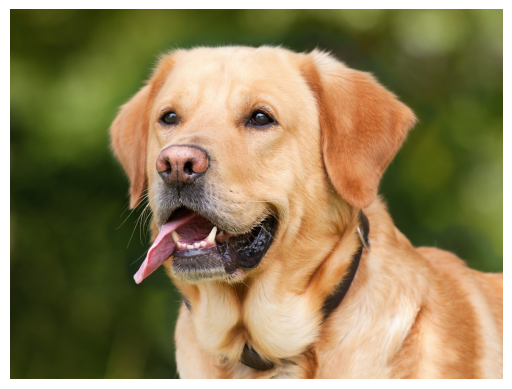

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2 as cv
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

plt.imshow(cv.cvtColor(cv.imread('dataset/single_prediction/cat_or_dog_1.jpg'),cv.COLOR_BGR2RGB))
plt.axis('off')

---



---
## **Praktikum 2**

#### **Klasifikasi Multi-label dengan Data CIFAT**

**Disclaimer**: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

### **Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 154s 1us/step


### **Langkah 3 - Verifikasi Data**


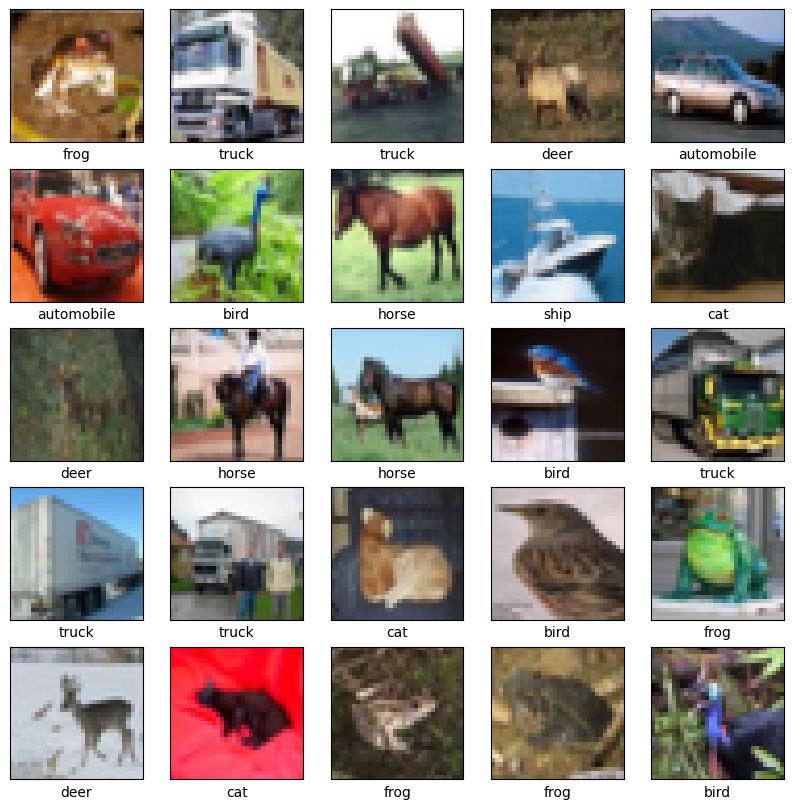

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Langkah 4 - Buat Model CNN**


#### **Langkah 4.1. - Buat Layer Konvolusi**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### **Langkah 4.5. - Compile Model CNN**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.5257 - accuracy: 0.4411 - val_loss: 1.2503 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1592 - accuracy: 0.5905 - val_loss: 1.0876 - val_accuracy: 0.6187
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0097 - accuracy: 0.6436 - val_loss: 1.0184 - val_accuracy: 0.6390
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9013 - accuracy: 0.6858 - val_loss: 0.9209 - val_accuracy: 0.6790
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8233 - accuracy: 0.7129 - val_loss: 0.9032 - val_accuracy: 0.6823
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7680 - accuracy: 0.7315 - val_loss: 0.8437 - val_accuracy: 0.7106
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7161 - accuracy: 0.7495 - val_loss: 0.8841 - val_accuracy:

### **Langkah 6 - Evaluasi Model**

313/313 - 0s - loss: 0.8340 - accuracy: 0.7219 - 407ms/epoch - 1ms/step


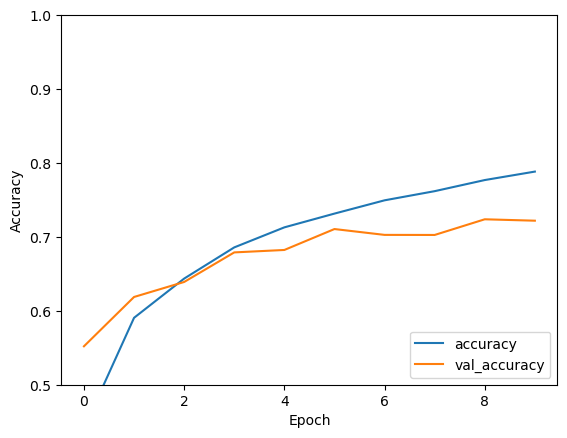

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### **Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.7218999862670898


---

## **Tugas Praktikum**

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
* Buatlah model CNN untuk klasifikasi dataset MNIST.

---
#### **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

**1. Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-11-09 20:28:55.840791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 20:28:55.840821: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 20:28:55.841577: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 20:28:55.917008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**2. Load CIFAR-10 dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**4. Buat model CNN**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

**7. Compile modelnya**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**8. Latih model dengan lebih banyak epoch**

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


2023-11-09 20:53:38.217570: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 25s 13ms/step - loss: 1.5641 - accuracy: 0.4644 - val_loss: 1.2317 - val_accuracy: 0.5547
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9508 - accuracy: 0.6696 - val_loss: 0.7477 - val_accuracy: 0.7363
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7609 - accuracy: 0.7389 - val_loss: 0.8644 - val_accuracy: 0.7076
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6545 - accuracy: 0.7756 - val_loss: 0.5962 - val_accuracy: 0.7969
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5619 - accuracy: 0.8098 - val_loss: 0.7004 - val_accuracy: 0.7707
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4917 - accuracy: 0.8343 - val_loss: 0.5326 - val_accuracy: 0.8202
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4289 - accuracy: 0.8546 - val_loss: 0.5602 - val_accura

**9. Evaluasi hasil model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.5386 - accuracy: 0.8587 - 1s/epoch - 4ms/step
Test accuracy: 0.8586999773979187


**10. Plot training history**

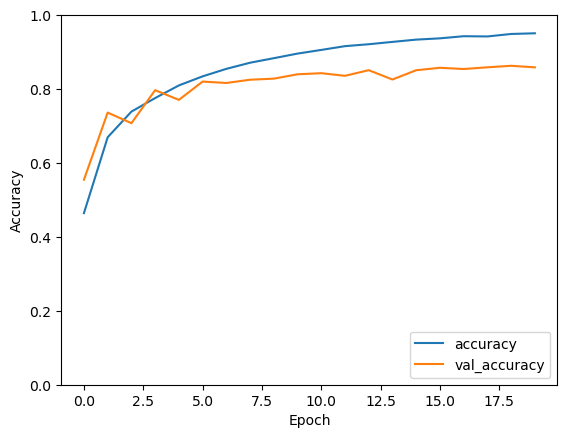

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



#### **Model CNN untuk klasifikasi dataset MNIST.**

**1. Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**2. Load Mnist dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

**3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**4. Buat model CNN**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**5. Compile modelnya**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**6. Latih model dengan lebih banyak epoch**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9557 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0307 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0336 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0357 - val_accuracy:

**7. Evaluasi hasil model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - loss: 0.0407 - accuracy: 0.9906 - 460ms/epoch - 1ms/step
Test accuracy: 0.9905999898910522


**8. Plot training history**

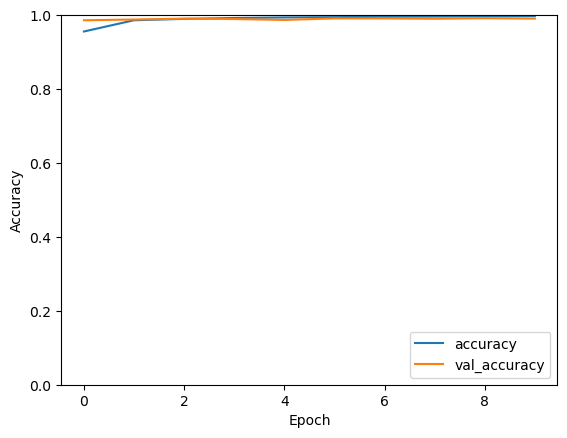

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()